# Case Study on ANN

## Mobile Price Classification using Neural Networks

In this case study, we address the problem of mobile price range classification using a supervised machine learning approach. The goal is to predict the price category (one of four classes) of a mobile phone based on a variety of technical specifications such as RAM, internal memory, battery capacity, camera quality, and other features like 4G, dual SIM, and Bluetooth support etc..

To solve this problem, we implement a feedforward neural network (also known as a multilayer perceptron) using TensorFlow and Keras. This model is well-suited for structured, tabular data and can learn complex, non-linear relationships between features.

The workflow includes:

 * Data preprocessing: Identifying binary, categorical, and numerical features and applying appropriate transformations such as scaling.

 * Model architecture: Designing a multi-layer neural network with ReLU activations, dropout regularization, and a softmax output layer for multi-class classification.

 * Training and evaluation: Splitting the dataset into training, validation, and test sets to ensure robust performance evaluation.

 * Hyperparameter tuning: Exploring different model configurations using techniques like manual search and automated tuning via Keras Tuner.

This approach demonstrates the effectiveness of neural networks for classification tasks on tabular data and highlights the importance of careful data preparation and model optimization.



In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset
df = pd.read_csv("/content/mobile_price_classification (1).csv")

In [3]:
#the first five rows
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#the shape of the dataframe
df.shape

(2000, 21)

In [5]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
#stastical summary
df.describe(include="all")

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# just trying to understand data -
# threeg and 4G seems to have redundant data - it is clear from the
# contingency table they have a quite strong relation - so removing threeg

contingency_table = pd.crosstab(df['4G'], df['three_g'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 three_g    0     1
4G                
0        477   480
1          0  1043


# EDA

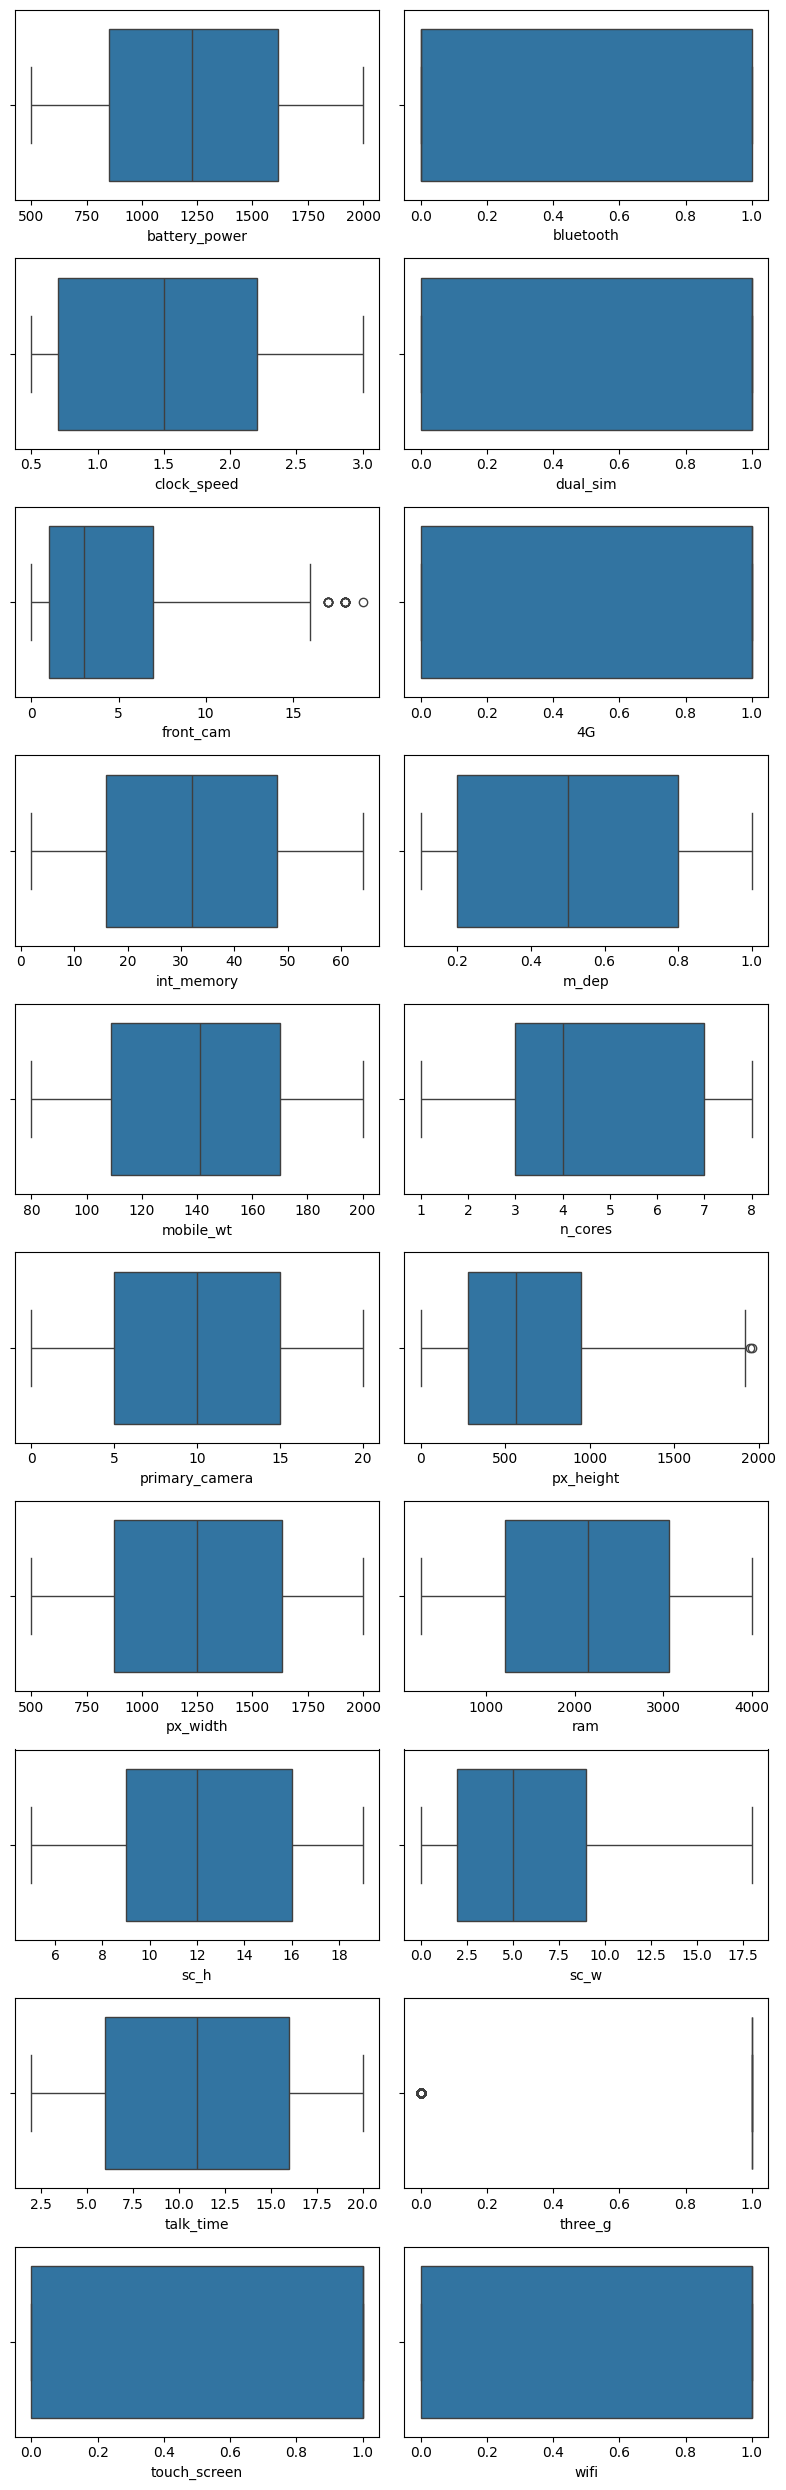

In [8]:
# check for outliers - for each column
# doesnt seem to have any outliers

fig, axes = plt.subplots(nrows = 10, ncols=2, figsize=(8,25))
axes = axes.flatten()

for i , column in enumerate(df.columns[:-1]):
  sns.boxplot(data=df, x=column, ax=axes[i])

plt.tight_layout()
plt.show()

<ipython-input-9-653950278>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y='ram', palette='viridis')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

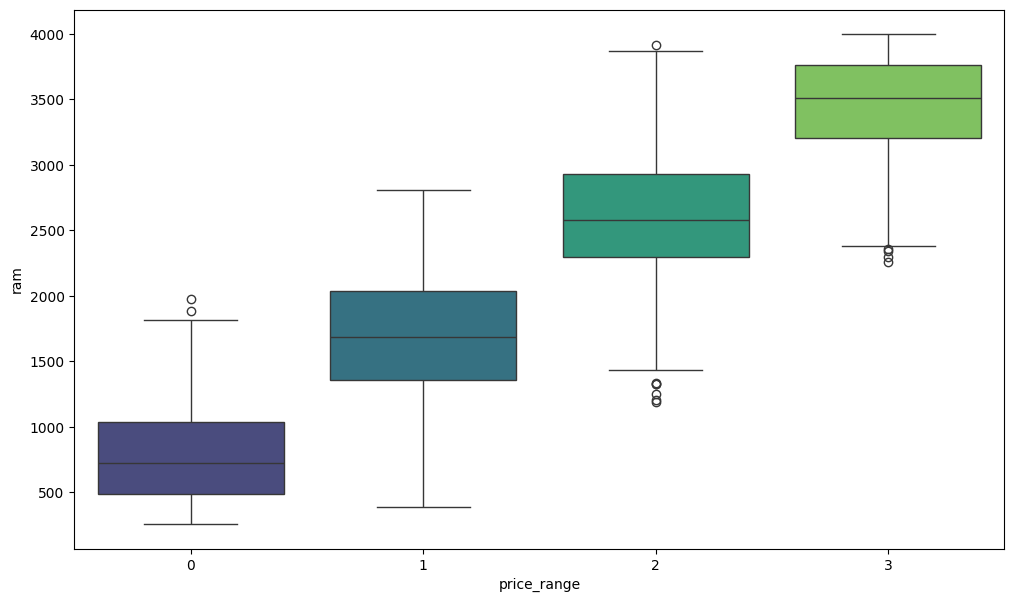

In [9]:
#relation between ram and price_range

plt.figure(figsize=(12, 7)) # Adjust figure size as needed
sns.boxplot(data=df, x='price_range', y='ram', palette='viridis')

plt

<Axes: xlabel='sc_h', ylabel='sc_w'>

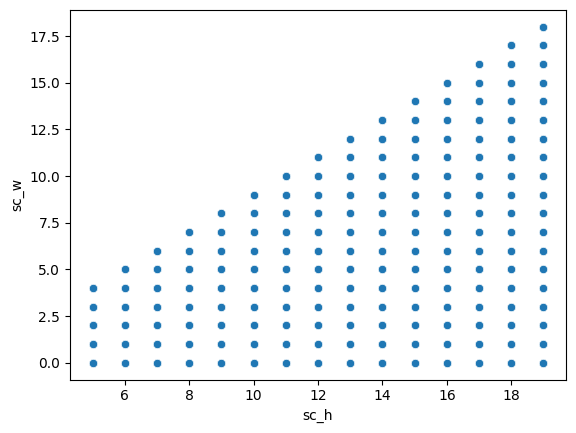

In [10]:
#compare sc and sh
sns.scatterplot(data=df, x='sc_h', y='sc_w')

<ipython-input-11-3213528977>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y='battery_power', palette='viridis')


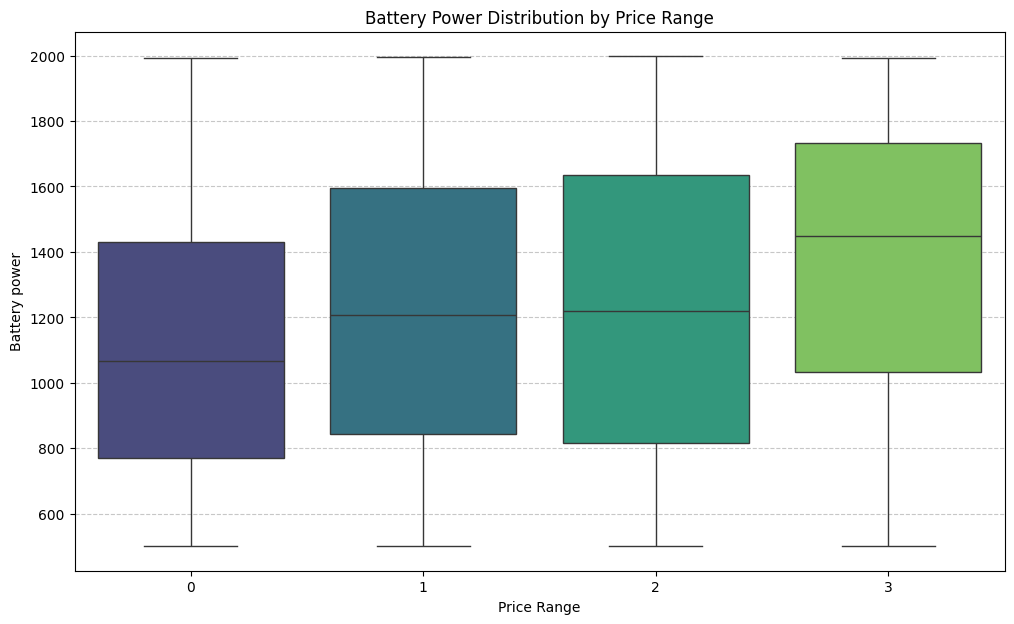

In [11]:
plt.figure(figsize=(12, 7)) # Adjust figure size as needed
sns.boxplot(data=df, x='price_range', y='battery_power', palette='viridis')

plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery power')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### note: preprocessing were done after spliting the data

# Data Splitting

In [12]:
#seperating target column
X = df.drop(columns=['price_range'])
y = df['price_range']

### why do we need a validation set?

#### We need a validation split to evaluate a neural network's performance during training and tune its hyperparameters without "peeking" at the final test data. This helps prevent overfitting, where the model performs well on the training data but poorly on unseen data.

##### we can either do it manually or specify it in model.fit() function

In [13]:
#manual splitting -
from sklearn.model_selection import train_test_split

'''

# Split into train + test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split train into train + validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#drop three_g - as we saw earlier three_g column is just redundant with 4G

X_train = X_train.drop(columns=['three_g'])
#X_val = X_val.drop(columns=['three_g'])
X_test = X_test.drop(columns=['three_g'])

In [15]:

# These are already 0/1, no further encoding needed
#binary_cols = ['bluetooth', 'dual_sim', '4G', 'touch_screen', 'wifi']

# front_cam is more like categorical - i thought not to encode since the inputs then
# are going to explode - so iam just gonna leave it as is but scaling is needed

# n_cores is more of an ordinal value. caling is needed

# All column except ones that have 0,1 value are scaled using standrad scaling
numerical_cols_to_scale = ['battery_power', 'clock_speed', 'front_cam', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [16]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [17]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

X_train_final = X_train.to_numpy()
X_test_final = X_test.to_numpy()


In [18]:
X_train.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
968,1.548360,0,-1.236230,1,0.620111,0,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.275712,1.181997,-0.580476,-0.528061,0.759509,-1.445123,1,1
240,-1.379535,1,0.837112,0,-0.993561,1,0.919763,-1.403674,-0.046246,1.510316,-1.476497,-0.258762,-0.556547,1.336453,-0.290196,-1.084869,0.915929,1,1
819,-0.010914,0,-0.748385,1,-0.532512,1,1.359577,-1.403674,1.340790,-1.547446,0.685498,-0.285711,-1.020159,-0.657302,0.423400,1.451150,1.642407,0,1
692,-1.043621,0,-0.504462,0,-0.532512,0,0.315017,-0.357620,1.623858,0.199847,-0.478653,-0.764042,0.984962,1.288322,0.185535,0.528962,-1.081884,0,1
420,0.488416,1,-1.236230,1,0.620111,0,-1.389265,-0.357620,-1.008680,0.199847,0.352883,0.401470,-0.336332,-0.489767,-1.479523,-0.162680,1.642407,0,1


In [19]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


#Model Training

couple of things to note:

price_range column (target) contains values such as 0, 1, 2, 3 each depicting a particular price range, this is a multi-classification problem, so we should convert this to a one hot encoded value, to match softmax layer output.(which we are using in this case)

#### ->  Softmax is an activation function used in the output layer of neural networks for multi-class classification. It takes a set of raw numerical scores (called logits) and converts them into probabilities for each class. These probabilities always sum up to 1, making them easy to interpret.

In [20]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding if using softmax output
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_shape=(X_train_final.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Breakdown of the nueral network architecture

model = Sequential([...]):

  * This line initializes a Sequential model, which is a linear stack of layers. You add layers to it one by one in the order they should be processed. It's suitable for simple feed-forward neural networks.

Dense(64, input_shape=(X_train_final.shape[1],), activation='relu'):

  * This is the first hidden layer (and the input layer in terms of defining the input shape).
  Dense(64, ...): It's a Dense layer, meaning it's a fully connected layer. Each neuron in this layer is connected to every neuron in the previous layer. It has 64 neurons (or units). This number is a hyperparameter you choose.

input_shape=(X_train_final.shape[1],):

  * This argument is crucial for the very first layer in a Sequential model. It tells the model the shape of the input data it expects. X_train_final.shape[1] refers to the number of features (columns) in your input training data. The comma after it indicates that it's a tuple, even for a single dimension.

activation='relu':

  * This specifies the activation function used by the neurons in this layer. 'relu' stands for Rectified Linear Unit, which outputs the input directly if it's positive, otherwise it outputs zero (f(x)=max(0,x)). It's a very common and effective choice for hidden layers due to its computational efficiency and ability to mitigate the vanishing gradient problem.

Dropout(0.3):

  * This layer implements dropout regularization.
0.3: This is the dropout rate. It means that during each training step, 30% of the neurons in the previous layer (the Dense layer with 64 units) are randomly set to zero (temporarily "dropped out").

 * Purpose: Dropout helps prevent overfitting. By randomly dropping neurons, it forces the network to learn more robust features and prevents individual neurons from relying too heavily on specific inputs or other neurons. It acts as an ensemble method by training multiple "thinned" networks simultaneously.

Dense(32, activation='relu'):

 * This is the second hidden layer.
It's another Dense (fully connected) layer, but this time with 32 neurons.

activation='relu':

 * Again, it uses the ReLU activation function. The output from the previous Dropout layer (which is a thinned version of the 64-neuron layer's output) feeds into this layer.

Dense(4, activation='softmax'):

 * This is the output layer of your neural network.
Dense(4, ...): It has 4 neurons. This number directly corresponds to the number of classes you are trying to classify. we have four classes in price_range so 4.

activation='softmax':

 * This is the activation function typically used for multi-class classification problems.(As we said earlier) The softmax function takes the raw outputs from the 4 neurons and converts them into a probability distribution. The output will be 4 numbers, each representing the probability that the input belongs to a specific class, and these four probabilities will sum up to 1. For example, [0.1, 0.7, 0.15, 0.05] could be an output for an input belonging to the second class with 70% probability.

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#### Optimizer: Adam

##### What is it?:
 * Adam (Adaptive Moment Estimation) is an optimization algorithm. When a neural network is trained, it learns by iteratively adjusting its internal parameters (weights and biases) to minimize the difference between its predictions and the actual target values. The optimizer's job is to figure out how to make these adjustments.

##### How it works (Simplified):
 * It's an extension of stochastic gradient descent (SGD).
It adapts the learning rate for each parameter individually based on the first and second moments of the gradients (i.e., it keeps track of both the average and the variance of past gradients).

This adaptive nature makes it very efficient and effective for a wide range of deep learning problems, often converging faster and achieving better results than simpler optimizers like basic SGD.

##### Why use it?:
 * Adam is one of the most popular default optimizers because it generally performs well, is relatively robust to hyperparameter choices (like the initial learning rate), and handles sparse gradients and noisy problems efficiently.




#### Loss Function: categorical_crossentropy

##### What it is?:
 * categorical_crossentropy is a loss function (also known as an objective function or cost function). Its purpose is to quantify the error or "distance" between the neural network's predicted probabilities (output from the softmax layer) and the true, one-hot encoded labels.

##### How it works:

 * It's specifically designed for multi-class classification problems where the true labels are in one-hot encoded format (e.g., [0, 1, 0] for class B).

  It penalizes incorrect predictions more heavily if the model was confident in its wrong prediction. For example, if the true class is A ([1, 0, 0]) and the model predicts [0.05, 0.9, 0.05] (very confident it's class B), the categorical_crossentropy loss will be very high. If it predicted [0.4, 0.3, 0.3], the loss would be lower.

#### Why use it?:
 * It's the standard and most appropriate loss function when your output layer uses softmax activation and your target labels are one-hot encoded.

 * The optimizer (adam) uses the gradients of the loss (categorical_crossentropy) with respect to the model's weights to update those weights during training. The goal is to minimize this loss.

 * The metrics (accuracy) are calculated and reported during training (and evaluation) to give you an easily understandable measure of performance, even though they aren't directly used to adjust the model's weights during optimization.

In [23]:
#training the model -
# as I mentioned earlier, - validation in the fit method.
history = model.fit(X_train_final, y_train_cat,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_test_final, y_test_cat))


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2882 - loss: 1.4212 - val_accuracy: 0.6325 - val_loss: 1.0689
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 1.0500 - val_accuracy: 0.7600 - val_loss: 0.6977
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.7514 - val_accuracy: 0.8500 - val_loss: 0.4906
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7761 - loss: 0.5572 - val_accuracy: 0.8975 - val_loss: 0.3925
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4652 - val_accuracy: 0.9200 - val_loss: 0.3130
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.3998 - val_accuracy: 0.9075 - val_loss: 0.2806
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8454 - loss: 0.3533 - val_accuracy: 0.9425 - val_loss: 0.2426
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3398 - val_accuracy: 0.

 * history = model.fit(...): This calls the fit method on your model object, starting the training process. The history variable will store details about the training (like loss and accuracy values per epoch), which can be later used for visualization purpose.

In [24]:
loss, accuracy = model.evaluate(X_test_final, y_test_cat)
print(f"Test Accuracy: {accuracy:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9651 - loss: 0.1122  
Test Accuracy: 0.95


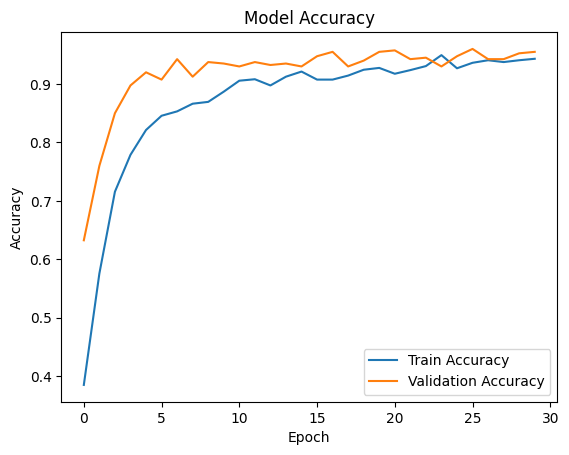

In [25]:
import matplotlib.pyplot as plt
#plotting the training progress , using data stored in history.

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Hyper-parameter Tuning


#### Hyperparameter tuning in neural networks is the process of finding the best set of external configuration variables for your learning algorithm (hyperparameters) that optimize the model's performance on a given task. Unlike model parameters (weights and biases), which are learned during training, hyperparameters are set before training.

Key hyperparameters include:

 * Learning Rate: How much the model adjusts its weights with each step.
 * Number of Hidden Layers and Neurons: The depth and width of the network.
 * Activation Functions: The non-linear functions used in layers (e.g., ReLU, sigmoid, tanh).
 * Batch Size: The number of training samples processed before the model's weights are updated.
 * Number of Epochs: How many times the entire training dataset is passed through the network.
 * Optimizer: The algorithm used to update weights (e.g., Adam, SGD).
 * Regularization Strength: Parameters for techniques like Dropout or L1/L2 regularization.

The goal is to select hyperparameters that allow the model to learn effectively from the training data while generalizing well to unseen data, preventing both underfitting and overfitting. This often involves systematic search strategies like Grid Search, Random Search, or more advanced methods like Bayesian Optimization.

In [26]:
# first trying out manual hyper parameter tuning where we say specify different values for a paramater
# and then for each keeping the other parameters same, we build a model and train it, and compare
# each one with another to find the best one, this is tedious and time consuming and non-practical.

# for each parameter of ours we have to create a seperate model, so to reduce code, we write a reusabe function.
def build_model(dropout=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, input_shape=(X_train_final.shape[1],), activation='relu'),
        Dropout(dropout),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [27]:
#specifying values for batch_size parameter
batch_sizes = {16, 32, 64}
results = {}

for bs in batch_sizes:
  model = build_model()
  history = model.fit(X_train_final, y_train_cat, epochs=30, batch_size=bs, validation_data=(X_test_final, y_test_cat))
  results[f'batch_size={bs}'] = history


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3394 - loss: 1.3798 - val_accuracy: 0.6150 - val_loss: 1.0181
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5745 - loss: 0.9718 - val_accuracy: 0.7875 - val_loss: 0.6673
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7295 - loss: 0.6962 - val_accuracy: 0.8500 - val_loss: 0.4711
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7817 - loss: 0.5420 - val_accuracy: 0.8800 - val_loss: 0.3608
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8339 - loss: 0.4169 - val_accuracy: 0.9150 - val_loss: 0.3007
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3568 - val_accuracy: 0.9025 - val_loss: 0.2605
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8849 - loss: 0.3071 - val_accuracy: 0.9375 - val_loss: 0.2295
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.2942 - val_accuracy: 0.

In [28]:

#visualizing how each parameter contribute to accuracy and loss
def plot_results(results, metric='accuracy'):
  plt.figure(figsize=(10,6))
  for label, history in results.items():
    plt.plot(history.history[metric], label=label)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()
  plt.grid(True)
  plt.show()


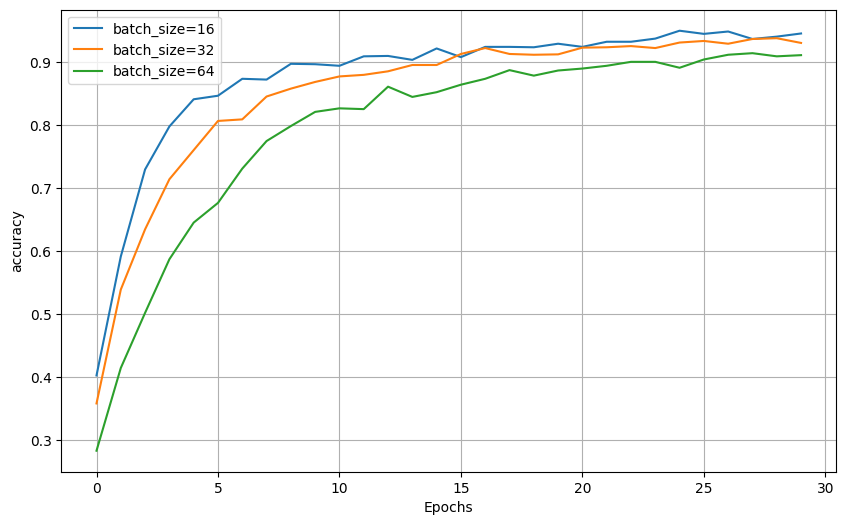

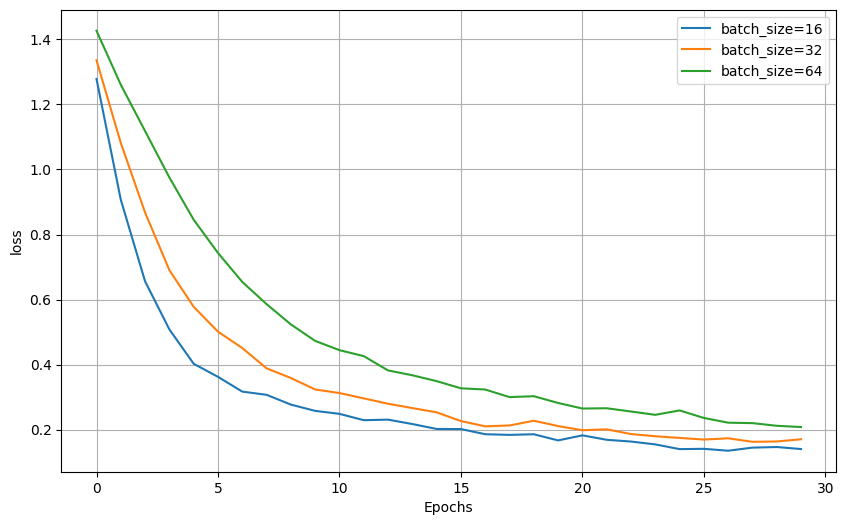

In [29]:
plot_results(results, metric='accuracy')
plot_results(results, metric='loss')

 * Keras Tuner is a library that helps you find the optimal set of hyperparameters for your TensorFlow/Keras models. Instead of manually trying different combinations of learning rates, number of layers, neurons, activation functions, etc., Keras Tuner automates this search process.

##### Random Search and Grid Search are two common strategies used in hyperparameter tuning to find the best set of hyperparameters for a machine learning model.

#### Grid Search:

 * What it is: You define a "grid" of hyperparameter values you want to test. For example, if you want to test learning rates [0.01, 0.001] and batch sizes [32, 64], Grid Search will try every possible combination from this predefined grid (i.e., (0.01, 32), (0.01, 64), (0.001, 32), (0.001, 64)).

 * Pros: Guaranteed to find the best combination within the defined grid. Easy to implement and understand.

 * Cons: Can be computationally very expensive and time-consuming, especially with many hyperparameters or a large range of values, as the number of combinations grows exponentially. It might miss optimal values if they fall between the grid points.

#### Random Search:

 * What it is: Instead of trying every combination, Random Search selects hyperparameter values randomly from the defined search space for a fixed number of iterations. For example, you might tell it to try 50 random combinations of learning rates (chosen from a range) and batch sizes (chosen from a list).

 * Pros: Often more efficient than Grid Search, especially when some hyperparameters are more influential than others. It's more likely to find a good combination in fewer iterations, as it explores the space more broadly.

 * Cons: Not guaranteed to find the absolute best combination if the number of iterations is too small or if the random sampling misses the optimal regions. However, in practice, it often finds "good enough" or even better solutions than Grid Search in less time.

In [32]:
#now lets do random search approah
# pip install keras_tuner - have to install it
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [33]:
#we are specifying the values of each parameter that we want to check for-
# The tanh (hyperbolic tangent) activation function is
# a non-linear function commonly used in neural networks that squashes its input values to a range between -1 and 1.

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Choice('units_1', values=[32, 64, 128]),
        activation=hp.Choice('act_1', ['relu', 'tanh']),
        input_shape=(X_train_final.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    model.add(Dense(
        units=hp.Choice('units_2', values=[16, 32, 64]),
        activation=hp.Choice('act_2', ['relu', 'tanh'])
    ))

    model.add(Dense(4, activation='softmax'))  # Output layer

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [34]:
#this is where we call the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='mobile_classification_ann'
)


In [35]:
#starting the random search
tuner.search(X_train_final, y_train_cat,
             epochs=20,
             batch_size=32,
             validation_data=(X_test_final, y_test_cat),
             verbose=1)


Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.9825000166893005

Best val_accuracy So Far: 0.9825000166893005
Total elapsed time: 00h 01m 51s


In [36]:
#best_model contains trained Keras model
best_model = tuner.get_best_models(num_models=1)[0]
tuner.results_summary()


Results summary
Results in tuner_results/mobile_classification_ann
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
units_1: 64
act_1: tanh
dropout_1: 0.2
units_2: 64
act_2: tanh
lr: 0.001
Score: 0.9825000166893005

Trial 05 summary
Hyperparameters:
units_1: 128
act_1: relu
dropout_1: 0.2
units_2: 16
act_2: tanh
lr: 0.001
Score: 0.9549999833106995

Trial 04 summary
Hyperparameters:
units_1: 32
act_1: relu
dropout_1: 0.2
units_2: 16
act_2: relu
lr: 0.01
Score: 0.9424999952316284

Trial 07 summary
Hyperparameters:
units_1: 128
act_1: relu
dropout_1: 0.4
units_2: 32
act_2: relu
lr: 0.01
Score: 0.9275000095367432

Trial 08 summary
Hyperparameters:
units_1: 128
act_1: relu
dropout_1: 0.30000000000000004
units_2: 16
act_2: tanh
lr: 0.01
Score: 0.925000011920929

Trial 02 summary
Hyperparameters:
units_1: 128
act_1: tanh
dropout_1: 0.30000000000000004
units_2: 16
act_2: relu
lr: 0.0001
Score: 0.7799999713897705

Trial 03 summary
Hyperpa

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
#getting the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print(best_hps.values)


{'units_1': 64, 'act_1': 'tanh', 'dropout_1': 0.2, 'units_2': 64, 'act_2': 'tanh', 'lr': 0.001}


In [39]:
#printing loss and accuracy of new model
loss, accuracy = best_model.evaluate(X_test_final, y_test_cat, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1537
Test Accuracy: 0.9825


### Conclusion

 * In this case study, we successfully implemented a feedforward artificial neural network (ANN) to classify mobile phones into different price categories based on various features. Starting with data preprocessing, we identified and handled binary and numerical features appropriately, applied scaling where needed, and split the data into training, validation, and test sets to ensure reliable evaluation.

  Our initial neural network, with a manually chosen architecture and default hyperparameters, achieved an impressive accuracy of around 95% on the validation set. After experimenting with different configurations and performing manual hyperparameter tuning, we were able to further optimize the model, reaching a final accuracy of approximately 98%.

  This demonstrates that even a basic feedforward neural network, when properly designed and tuned, can deliver strong performance on structured classification problems.